In [16]:
import pandas as pd
import numpy as np
import re

In [17]:
df=pd.read_csv('sbsspecial.csv', encoding='cp949')

In [70]:
df2=df.dropna(axis=0)
#dr2=df.dropna(how="any")

In [71]:
df2.head(10)

,Unnamed: 0,tv,title,episode,date,link,synopsys
0,0,SBS,SBS 스페셜,복흥 O.B.A 소녀들은 자란다,2018.09.16(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11...
1,1,SBS,SBS 스페셜,자영업 공화국의 눈물,2018.09.09(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 자영업 공화국의 눈물방송일시: 2018년 9월 9일(일) 밤 11시 5분연출: ...
2,2,SBS,SBS 스페셜,다시 쓰는 불면일기 잠은 죽어서 자나?!,2018.09.02(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ ??다시 쓰는 불면일기잠은 죽어서 자나?!방송일시 : 2018년 9월 2일(일)...
3,3,SBS,SBS 스페셜,아이와 여행하는 법,2018.08.12(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: ...
4,4,SBS,SBS 스페셜,영미네 작은 식탁,2018.08.05(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 영미네 작은 식탁방송일시: 2018년 8월 5일(일) 밤 11시 5분연출: 황성...
5,5,SBS,SBS 스페셜,2부작 블루존의 비밀 2부 파워나인을 실현하라,2018.07.29(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[]
6,6,SBS,SBS 스페셜,2부작 블루존의 비밀 1부 무엇이 죽음을 잊게 했나,2018.07.22(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 2부작 블루존의 비밀1부 무엇이 죽음을 잊게 했나방송일시: 2018년 7월 22...
7,7,SBS,SBS 스페셜,미스터리한 나의 어머니 황정례,2018.07.08(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 미스터리한 나의 어머니 황정례방송일시: 2018년 7월 8일(일) 밤 11시 5...
8,8,SBS,SBS 스페셜,식탁 위로 돌아 온 미세 플라스틱,2018.07.01(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 식탁 위로 돌아 온 미세 플라스틱방송일시: 2018년 7월 1일 일요일 밤 11...
9,9,SBS,SBS 스페셜,취준진담 역지사지 면접 프로젝트,2018.06.10(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 취준진담 역지사지 면접 프로젝트??방송일시: 2018년 6월 10일(...


In [52]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [65]:
#샘플로 볼 인덱스 번호
sample_index = 3

In [66]:
sample_epi = df2['episode'][sample_index]
sample_epi

'아이와 여행하는 법'

In [67]:
sample_synop = df2['synopsys'][sample_index]
sample_synop

'[ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: 장경수 / 글·구성: 김설화▶ 여행에도 방법이 있다?!?나는 아이와 몇 점짜리 여행을 하고 있을까?     누구나 여행은 좋다고 생각한다. 특히 아이를 가진 부모라면?막연히 ‘여행은 아이에게 좋을 거야~’ 라는 생각으로?국내외를 막론하고 여행을 떠난다.?그런데 지금 우리가 하고 있는 여행이?정말 아이들에게도 좋은 여행일까??우리 가족의 여행 만족도를 점수로 매겨 본다면 어떨까??누구는 만점~ 누구는 빵점~?아이를 위한다고 애쓴 마음은 똑같은데 점수는 천지차이!도대체 그 차이는 어디에서부터 오는 것일까??▶ 자타공인 ‘여행고수’ 개그맨 정종철이 나섰다!?우리 가족여행은 이백점일 걸요!!     살림에 요리는 기본~ 아이들과 놀아주기도 척척!?최근 ‘옥주부’라는 별명까지 얻으며 제 2의 전성기를 누리고 있는?삼남매의 아빠 개그맨 정종철!?집안 곳곳 여행 사진이 빼곡할 정도로?가족들과 여행을 많이 해온 그는 자신들의 여행이?백점 만점에 이백점일 거라고 자신하는데...?그때 막내 딸 시아의 한마디!!?“저는 38점 드리겠습니다.”우리 가족 여행, 대체 어디서부터 어떻게 잘못된 것일까??비장한 얼굴의 정종철은 삼남매에게 외친다.?이번엔 우리 팀 좀 나눠서 다르게 떠나보자고~~??    그렇게 향한 곳은 일본 삿포로.?엄마 팀은 원래 이 가족이 하던 대로 엄마 주도 여행을~?아빠 팀은 아이들이 모든 것을 주도적으로 진행하는?아이 주도 여행을 해보기로 했는데...?&lt;엄마 주도 여행&gt; vs &lt;아이 주도 여행&gt; 방법만 살짝 바꿨을 뿐인데?그 결과는 놀랍기만 하다?!!?▶ 아이와 함께 ‘제대로’ 여행하는 법     ‘아빠 구름 위에 올라갈 수 있어요?’?‘소리도 사냥을 할 수 있어요?’?아이의 말도 안 되는 상상력과 호기심을 찾아 여행을 나서는 부녀.요즘 젊은 엄마들의 로망인 ‘000에서 살기‘ 여행을?그것도 태국 치앙마이에서 두 아이와 함께 세달 살기 하고 있는 가족.?여

# 토큰화

#### sample_index 3의 시놉시스를 토근화

In [68]:
token_epi = tokenizer.tokenize(sample_epi)
token_epi

['아이와', '여행하는', '법']

In [56]:
token_synop = tokenizer.tokenize(sample_synop)
token_synop[:30]

['[',
 '아이와',
 '여행하는',
 '법방송일시',
 ':',
 '2018',
 '년',
 '8',
 '월',
 '12',
 '일',
 '(',
 '일',
 ')',
 '밤',
 '11',
 '시',
 '5',
 '분연출',
 ':',
 '장경수',
 '/',
 '글',
 '·',
 '구성',
 ':',
 '김설화',
 '▶',
 '여행에도',
 '방법이']

# 텍스트 데이터 전처리

In [69]:
df2

,Unnamed: 0,tv,title,episode,date,link,synopsys
0,0,SBS,SBS 스페셜,복흥 O.B.A 소녀들은 자란다,2018.09.16(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11...
1,1,SBS,SBS 스페셜,자영업 공화국의 눈물,2018.09.09(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 자영업 공화국의 눈물방송일시: 2018년 9월 9일(일) 밤 11시 5분연출: ...
2,2,SBS,SBS 스페셜,다시 쓰는 불면일기 잠은 죽어서 자나?!,2018.09.02(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ ??다시 쓰는 불면일기잠은 죽어서 자나?!방송일시 : 2018년 9월 2일(일)...
3,3,SBS,SBS 스페셜,아이와 여행하는 법,2018.08.12(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: ...
4,4,SBS,SBS 스페셜,영미네 작은 식탁,2018.08.05(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 영미네 작은 식탁방송일시: 2018년 8월 5일(일) 밤 11시 5분연출: 황성...
5,5,SBS,SBS 스페셜,2부작 블루존의 비밀 2부 파워나인을 실현하라,2018.07.29(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[]
6,6,SBS,SBS 스페셜,2부작 블루존의 비밀 1부 무엇이 죽음을 잊게 했나,2018.07.22(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 2부작 블루존의 비밀1부 무엇이 죽음을 잊게 했나방송일시: 2018년 7월 22...
7,7,SBS,SBS 스페셜,미스터리한 나의 어머니 황정례,2018.07.08(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 미스터리한 나의 어머니 황정례방송일시: 2018년 7월 8일(일) 밤 11시 5...
8,8,SBS,SBS 스페셜,식탁 위로 돌아 온 미세 플라스틱,2018.07.01(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 식탁 위로 돌아 온 미세 플라스틱방송일시: 2018년 7월 1일 일요일 밤 11...
9,9,SBS,SBS 스페셜,취준진담 역지사지 면접 프로젝트,2018.06.10(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 취준진담 역지사지 면접 프로젝트??방송일시: 2018년 6월 10일(...


개행문자 제거

In [72]:
def preprocessing(text):
    # 개항문자 제거
    text = re.sub('\\\n', ' ', text)
    return text

In [73]:
df2['synopsys'].apply(preprocessing)

0      [ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11...
1      [ 자영업 공화국의 눈물방송일시: 2018년 9월 9일(일) 밤 11시 5분연출: ...
2      [ ??다시 쓰는 불면일기잠은 죽어서 자나?!방송일시 : 2018년 9월 2일(일)...
3      [ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: ...
4      [ 영미네 작은 식탁방송일시: 2018년 8월 5일(일) 밤 11시 5분연출: 황성...
5                                                     []
6      [ 2부작 블루존의 비밀1부 무엇이 죽음을 잊게 했나방송일시: 2018년 7월 22...
7      [ 미스터리한 나의 어머니 황정례방송일시: 2018년 7월 8일(일) 밤 11시 5...
8      [ 식탁 위로 돌아 온 미세 플라스틱방송일시: 2018년 7월 1일 일요일 밤 11...
9      [       취준진담 역지사지 면접 프로젝트??방송일시: 2018년 6월 10일(...
10     [ 담 판 ??트럼프 vs 김정은, 그들의 선택은?방송일시: 2018년 6월 3일(...
11     [ 행복한? 부부생활을? 위한졸혼 연습방송일시: 2018년 5월 27일(일) 밤 1...
12     [ 84년생 김정은과 장마당 세대방송일시: 2018년 5월 20일 일요일 밤 11시...
13     [ 앵그리맘의 반격방송일시: 2018년 5월 13일 일요일 밤 11시 5분연출: 백...
14     [ 스마트폰 전쟁내 아이를 위한 스마트폰 사용설명서방송일시: 2018년 5월 6일 ...
15     [ 남북정상회담 특집SBS스페셜여섯 개의 봄방송일시: 2018년 4월 29일(일) ...
16     [      ???新 한류 어벤저스 - 왕서방이 다시 온다??방송일시: 2018년 ...
17     [ 고독한 우주인지구 귀환 3649일째?방송

In [74]:
%time sentences = df2['synopsys'].apply(preprocessing)

Wall time: 2.97 ms


In [86]:
tokens = sentences.apply(tokenizer.tokenize)
tokens[:5]

0    [[, 복흥, O, ., B, ., A, 소녀들은, 자란다, ?, 방송일시, :, ...
1    [[, 자영업, 공화국의, 눈물방송일시, :, 2018, 년, 9, 월, 9, 일,...
2    [[, ??, 다시, 쓰는, 불면일기잠은, 죽어서, 자나, ?!, 방송일시, :, ...
3    [[, 아이와, 여행하는, 법방송일시, :, 2018, 년, 8, 월, 12, 일,...
4    [[, 영미네, 작은, 식탁방송일시, :, 2018, 년, 8, 월, 5, 일, (...
Name: synopsys, dtype: object

### sample_index 10의 시놉시스로 worldcloud

In [78]:
tokens[sample_index][:10]

['[', '아이와', '여행하는', '법방송일시', ':', '2018', '년', '8', '월', '12']

In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [92]:
sentences

0      [ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11...
1      [ 자영업 공화국의 눈물방송일시: 2018년 9월 9일(일) 밤 11시 5분연출: ...
2      [ ??다시 쓰는 불면일기잠은 죽어서 자나?!방송일시 : 2018년 9월 2일(일)...
3      [ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: ...
4      [ 영미네 작은 식탁방송일시: 2018년 8월 5일(일) 밤 11시 5분연출: 황성...
5                                                     []
6      [ 2부작 블루존의 비밀1부 무엇이 죽음을 잊게 했나방송일시: 2018년 7월 22...
7      [ 미스터리한 나의 어머니 황정례방송일시: 2018년 7월 8일(일) 밤 11시 5...
8      [ 식탁 위로 돌아 온 미세 플라스틱방송일시: 2018년 7월 1일 일요일 밤 11...
9      [       취준진담 역지사지 면접 프로젝트??방송일시: 2018년 6월 10일(...
10     [ 담 판 ??트럼프 vs 김정은, 그들의 선택은?방송일시: 2018년 6월 3일(...
11     [ 행복한? 부부생활을? 위한졸혼 연습방송일시: 2018년 5월 27일(일) 밤 1...
12     [ 84년생 김정은과 장마당 세대방송일시: 2018년 5월 20일 일요일 밤 11시...
13     [ 앵그리맘의 반격방송일시: 2018년 5월 13일 일요일 밤 11시 5분연출: 백...
14     [ 스마트폰 전쟁내 아이를 위한 스마트폰 사용설명서방송일시: 2018년 5월 6일 ...
15     [ 남북정상회담 특집SBS스페셜여섯 개의 봄방송일시: 2018년 4월 29일(일) ...
16     [      ???新 한류 어벤저스 - 왕서방이 다시 온다??방송일시: 2018년 ...
17     [ 고독한 우주인지구 귀환 3649일째?방송

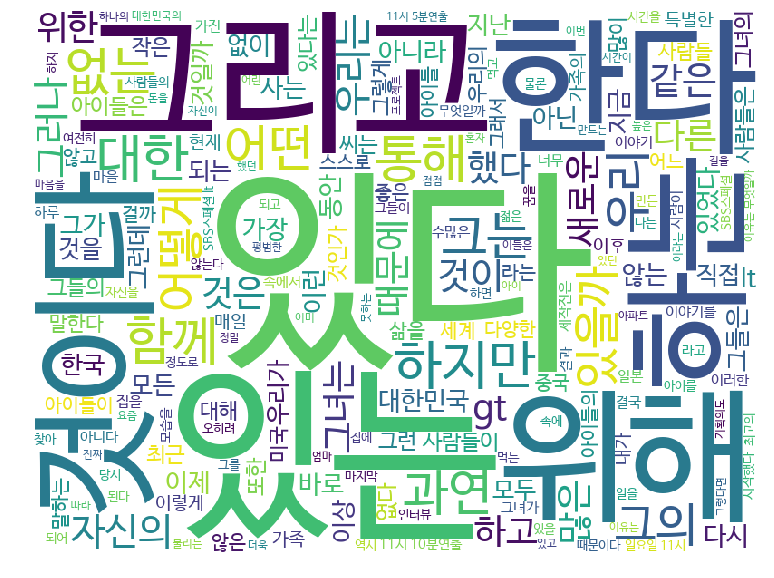

In [87]:
# 아래 코드로는 불용어(STOPWORD)가 많음.
displayWordCloud(' '.join(sentences))

### soynlp

In [88]:
from soynlp.noun import LRNounExtractor

In [89]:
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (10443, 5507) tokens
building lr-graph completed

In [91]:
nouns

{'5분': NounScore(frequency=93, score=0.9176570000000002, known_r_ratio=0.14492753623188406),
 '정지': NounScore(frequency=6, score=1.0, known_r_ratio=0.5),
 '반응': NounScore(frequency=24, score=0.5692786842105263, known_r_ratio=0.8636363636363636),
 '개척': NounScore(frequency=7, score=0.9968729999999999, known_r_ratio=0.75),
 '기증': NounScore(frequency=5, score=0.9760533333333333, known_r_ratio=0.6),
 '별거': NounScore(frequency=5, score=0.996513, known_r_ratio=0.25),
 '만재': NounScore(frequency=16, score=0.505755, known_r_ratio=0.5333333333333333),
 '보물': NounScore(frequency=8, score=0.7517769999999999, known_r_ratio=0.6666666666666666),
 '이것': NounScore(frequency=26, score=0.703809347826087, known_r_ratio=1.0),
 '장수': NounScore(frequency=9, score=0.9635115000000001, known_r_ratio=0.6666666666666666),
 '향상': NounScore(frequency=7, score=0.8018896, known_r_ratio=1.0),
 '사업': NounScore(frequency=36, score=0.8057790434782608, known_r_ratio=0.8846153846153846),
 '인간': NounScore(frequency=108, sco

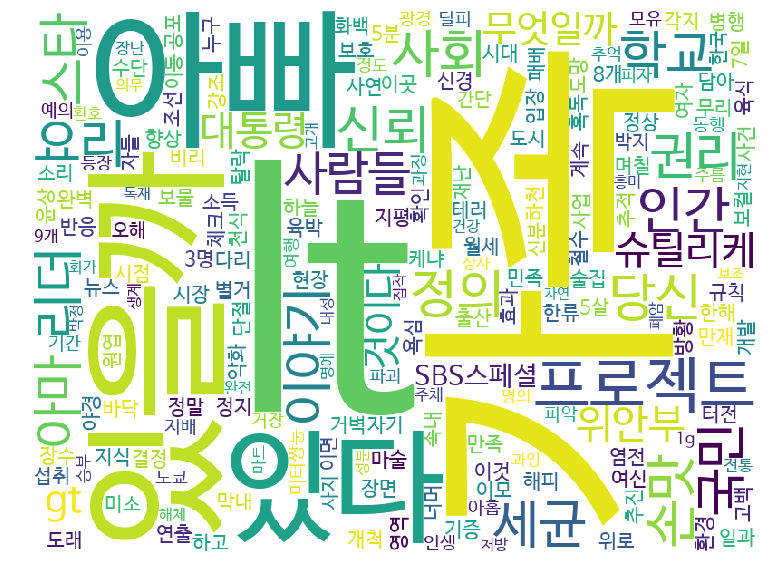

In [90]:
displayWordCloud(' '.join(nouns))

## 각 시놉시스의 빈출 단어 보기

In [93]:
sample_index = 3

In [95]:
sample_epi = df2['episode'][sample_index]
sample_epi

'아이와 여행하는 법'

In [96]:
sample_synop = df2['synopsys'][sample_index]
sample_synop

'[ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: 장경수 / 글·구성: 김설화▶ 여행에도 방법이 있다?!?나는 아이와 몇 점짜리 여행을 하고 있을까?     누구나 여행은 좋다고 생각한다. 특히 아이를 가진 부모라면?막연히 ‘여행은 아이에게 좋을 거야~’ 라는 생각으로?국내외를 막론하고 여행을 떠난다.?그런데 지금 우리가 하고 있는 여행이?정말 아이들에게도 좋은 여행일까??우리 가족의 여행 만족도를 점수로 매겨 본다면 어떨까??누구는 만점~ 누구는 빵점~?아이를 위한다고 애쓴 마음은 똑같은데 점수는 천지차이!도대체 그 차이는 어디에서부터 오는 것일까??▶ 자타공인 ‘여행고수’ 개그맨 정종철이 나섰다!?우리 가족여행은 이백점일 걸요!!     살림에 요리는 기본~ 아이들과 놀아주기도 척척!?최근 ‘옥주부’라는 별명까지 얻으며 제 2의 전성기를 누리고 있는?삼남매의 아빠 개그맨 정종철!?집안 곳곳 여행 사진이 빼곡할 정도로?가족들과 여행을 많이 해온 그는 자신들의 여행이?백점 만점에 이백점일 거라고 자신하는데...?그때 막내 딸 시아의 한마디!!?“저는 38점 드리겠습니다.”우리 가족 여행, 대체 어디서부터 어떻게 잘못된 것일까??비장한 얼굴의 정종철은 삼남매에게 외친다.?이번엔 우리 팀 좀 나눠서 다르게 떠나보자고~~??    그렇게 향한 곳은 일본 삿포로.?엄마 팀은 원래 이 가족이 하던 대로 엄마 주도 여행을~?아빠 팀은 아이들이 모든 것을 주도적으로 진행하는?아이 주도 여행을 해보기로 했는데...?&lt;엄마 주도 여행&gt; vs &lt;아이 주도 여행&gt; 방법만 살짝 바꿨을 뿐인데?그 결과는 놀랍기만 하다?!!?▶ 아이와 함께 ‘제대로’ 여행하는 법     ‘아빠 구름 위에 올라갈 수 있어요?’?‘소리도 사냥을 할 수 있어요?’?아이의 말도 안 되는 상상력과 호기심을 찾아 여행을 나서는 부녀.요즘 젊은 엄마들의 로망인 ‘000에서 살기‘ 여행을?그것도 태국 치앙마이에서 두 아이와 함께 세달 살기 하고 있는 가족.?여

In [97]:
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(tokens[sample_index])
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (33, 24) tokens
building lr-graph completed

In [98]:
nouns

{'여행': NounScore(frequency=28, score=0.5982851666666666, known_r_ratio=1.0),
 '가족': NounScore(frequency=7, score=0.9995259999999999, known_r_ratio=1.0),
 '아이': NounScore(frequency=20, score=0.8893162142857143, known_r_ratio=1.0)}

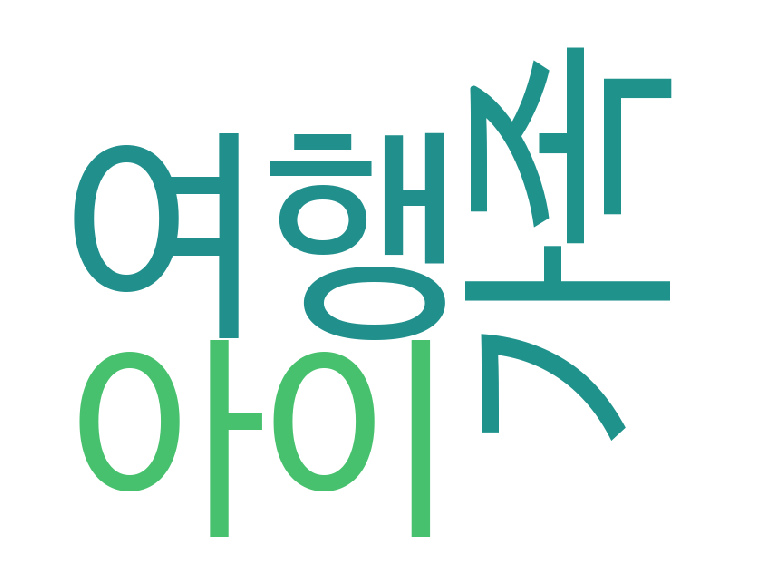

In [99]:
displayWordCloud(' '.join(nouns))